In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adpkrp5/error.csv
/kaggle/input/adpkrp5/data1.csv
/kaggle/input/adpkrp5/content.csv


# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

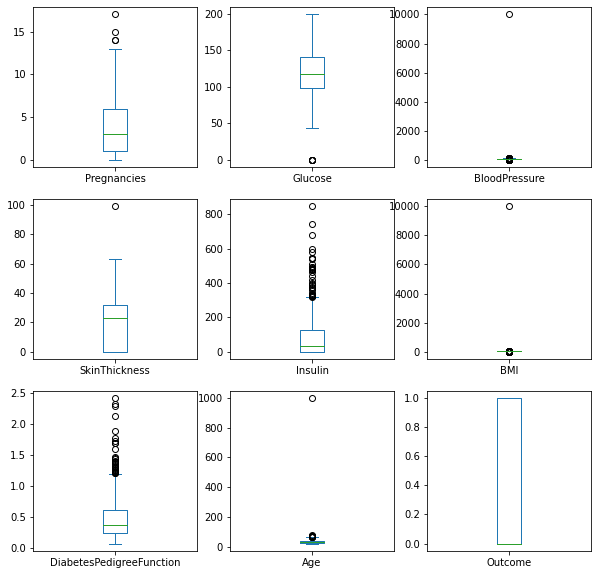

In [2]:
df = pd.read_csv('/kaggle/input/adpkrp5/data1.csv')
display(df.head())
df.info()
df.describe()
df.plot(kind='box',subplots=True,layout = (3,3),figsize=(10,10))

### 1-2 이상치 처리(이상값 대체방안 제시)

In [3]:
print('''age , bloodpressure,bmi에서 이상치값들이 확인된다. 3개미만의 이상치들이므로 해당값을 제외한 최댓값으로 대체한다''')


age , bloodpressure,bmi에서 이상치값들이 확인된다. 3개미만의 이상치들이므로 해당값을 제외한 최댓값으로 대체한다


In [4]:
df.loc[df.BloodPressure ==df.BloodPressure.max(), 'BloodPressure'] = df[df.BloodPressure !=df.BloodPressure.max()].BloodPressure.max()
df.loc[df.Age ==df.Age.max(), 'Age'] = df[df.Age !=df.Age.max()].Age.max()
df.loc[df.BMI ==df.BMI.max(), 'BMI'] = df[df.BMI !=df.BMI.max()].BMI.max()

<AxesSubplot:>

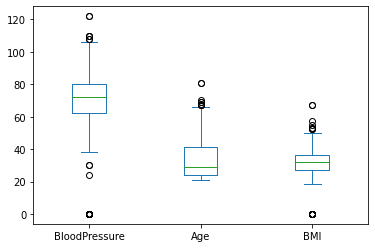

In [5]:
df[['BloodPressure','Age','BMI']].plot(kind='box')

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [6]:
print('''
흠...
''')


흠...



# 문제 2

In [7]:
print('모델링 생략~ 23회와 유사')

모델링 생략~ 23회와 유사


### 2-1 오버샘플링 과정 설명하고 결과 작성

### 2-2 언더샘플링 과정 설명하고 결과 작성

### 2-3 둘 중 선택하고 이유 설명

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

### 3-2 모델 비교하고 결과 설명

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

귀무가설 : 분산을 1.3이라 할 수 있다    
대립가설(연구가설) : 분산을 1.3이라 할 수 없다

### 4-2 양측 검정

In [8]:
df = pd.read_csv('/kaggle/input/adpkrp5/content.csv')

import numpy as np
from scipy.stats import chi2

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Q = (n - 1) * np.var(x) / va0 
    print('direction',direction)
    if direction == "lower":
        q = chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = chi2.ppf(1 - alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        print('Q',Q)
        print('q1',q1)
        print('q2',q2)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

        
var_test(df['content'], va0 = 1.3)

direction two-tailed
Q 326.6508365405755
q1 161.82618239364686
q2 239.9596818276442


'H_0 rejected'

### 4-3 검정통계량, 가설 채택

귀무가설 기각..! 

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [9]:
import matplotlib.pyplot as plt
d = pd.read_csv('/kaggle/input/adpkrp5/error.csv')
d['error_case_number'] = d['error_case_number']/200*100

mean =d['error_case_number'].mean()
ucl = mean + d['error_case_number'].std()*3
lcl = mean - d['error_case_number'].std()*3

print('cl : ',mean,'ucl : ',ucl,'lcl : ',lcl)

cl :  1.705 ucl :  6.6792290403091155 lcl :  -3.2692290403091153


### 5-2 관리도 시각화

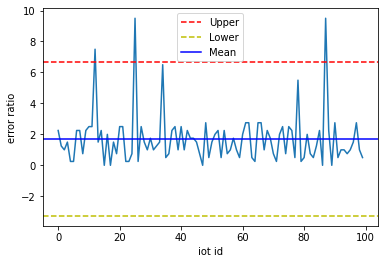

In [10]:

plt.plot(d['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--',label='Upper')
plt.axhline(y=lcl, color='y', linestyle='--',label='Lower')
plt.axhline(y=mean, color='b',label="Mean")
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품의 패턴이 임의적인지 확인하라

### 6-1 연구가설과 귀무가설 작성
- 귀무가설 : 연속적인 관측값이 임의적이다
- 대립가설 : 연속적인 관측값이 임의적이지 않다

### 6-2 평균과 표준편차   
참고 블로그 :https://blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=li0224il&logNo=220722414973

In [11]:
a = 14
b = 15

mean =2*a*b/(a+b) +1
std = (2*a*b*(2*a*b-a-b)/(a+b)**2/(a+b-1))**0.5
print('mean : ',mean,'std : ',std)

mean :  15.482758620689655 std :  2.6408030342821784


### 6-3 가설 채택

In [12]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# 귀무가설 : 랜덤생성
# 대립 : 랜덤생성이 아님
# 데이터 이진 변환, 각 패턴들을 구분지을 필요없이 하나로 연결
x = [1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0]
runstest_1samp(x, cutoff='mean', correction=True)

(-0.3721438547031917, 0.7097857460625617)